# 桨叶电机温度分析与建模
## 邱中凯
## 2018-06-14

In [34]:
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)

Toggle Code

## 1.  总体时序查看(正常状态)

##### <font color=#FF00FF size=3 face="微软雅黑">总体查看不同风场、不同机组 桨叶电机1温度的时序情况</font>

In [32]:
import os
import pandas as pd
import numpy as np

# 读取数据（风场1）
os.chdir(r'D:\00_工作日志\O\2018-06\赤峰项目故障\data\赤峰二期5min数据')
df_1 = pd.read_csv('CFEQ_wt3_5min_201601-201712.csv', index_col=0)
df_2 = pd.read_csv('CFEQ_wt6_5min_201601-201712.csv', index_col=0)

# 读取数据（风场2）
os.chdir(r'D:\00_工作日志\S\02_齿轮箱状态监测\2018-03\sys_data')
df_3_1 = pd.read_csv('ZYBL_wt10_5min_2015.csv', index_col=0)
df_3_2 = pd.read_csv('ZYBL_wt10_5min_2016.csv', index_col=0)
df_3 = pd.concat([df_3_1, df_3_2], axis=0)
df_4_1 = pd.read_csv('ZYBL_wt12_5min_2015.csv', index_col=0)
df_4_2 = pd.read_csv('ZYBL_wt12_5min_2016.csv', index_col=0)
df_4 = pd.concat([df_4_1, df_4_2], axis=0)

df_1 = df_1.loc[:, ['r76', 'r77', 'r78']]
df_2 = df_2.loc[:, ['r76', 'r77', 'r78']]
df_3 = df_3.loc[:, ['r76', 'r77', 'r78']]
df_4 = df_4.loc[:, ['r76', 'r77', 'r78']]

df_1.index = pd.to_datetime(df_1.index)
df_2.index = pd.to_datetime(df_2.index)
df_3.index = pd.to_datetime(df_3.index)
df_4.index = pd.to_datetime(df_4.index)

print(df_1.shape)
print(df_2.shape)
print(df_3.shape)
print(df_4.shape)

(208512, 3)
(208512, 3)
(210240, 3)
(210240, 3)


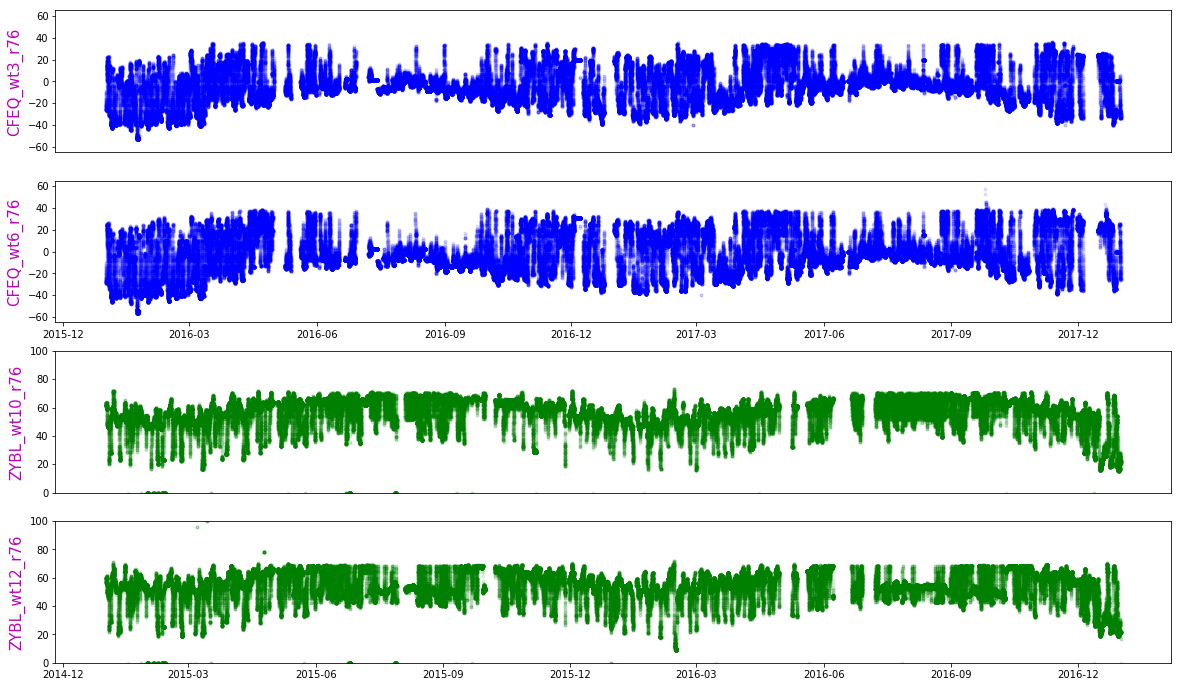

In [33]:
# 画图展示
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.family'] = 'Kaiti' #黑体
# matplotlib.rcParams['font.size'] = '20'
# plt.rcParams['axes.unicode_minus']=False # 解决负值不显示
plt.figure(figsize=(20,12))
plt.subplot(411), plt.plot(df_1['r76'], "b.", alpha=0.1), plt.ylabel('CFEQ_wt3_r76',fontsize=15, color='m'),plt.ylim((-65, 65)),plt.xticks([])
plt.subplot(412), plt.plot(df_2['r76'], "b.", alpha=0.1), plt.ylabel('CFEQ_wt6_r76',fontsize=15, color='m'),plt.ylim((-65, 65))
plt.subplot(413), plt.plot(df_3['r76'], "g.", alpha=0.1), plt.ylabel('ZYBL_wt10_r76',fontsize=15, color='m'),plt.ylim((0, 100)),plt.xticks([])
plt.subplot(414), plt.plot(df_4['r76'], "g.", alpha=0.1), plt.ylabel('ZYBL_wt12_r76',fontsize=15, color='m'),plt.ylim((0, 100))
plt.show()

#### 由图中可以得到以下四点结论：
* 相同风场、不同风机 的桨叶电机温度变化具有相似性
* 不同风场 的桨叶电机温度变化具有差异性
* 桨叶电机温度的变化具有季节性
* 相同风机的桨叶电机温度变化 一年与一年之间具有相似性

## 2.  总体时序查看(异常状态)

#####  <font color=#FF00FF size=2 face="微软雅黑">总体查看同一风机三个桨叶电机温度</font>

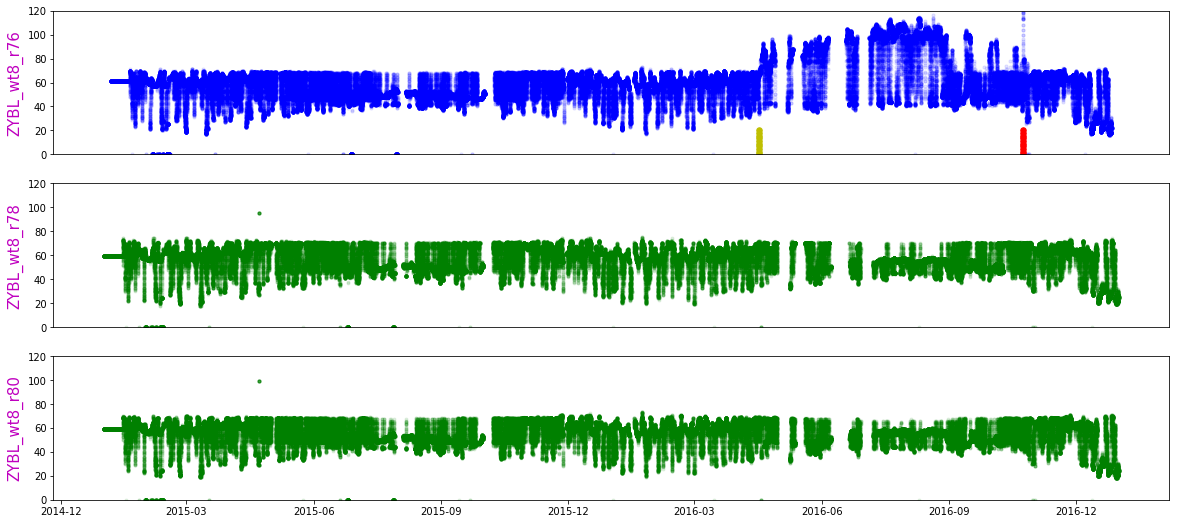

In [63]:
# 读取数据（风场2）
os.chdir(r'D:\00_工作日志\S\02_齿轮箱状态监测\2018-03\sys_data')
df_5_1 = pd.read_csv('ZYBL_wt8_5min_2015.csv', index_col=0)
df_5_2 = pd.read_csv('ZYBL_wt8_5min_2016.csv', index_col=0)
df_5 = pd.concat([df_5_1, df_5_2], axis=0)
df_5 = df_5.loc[:, ['r76', 'r78', 'r80']]
df_5.index = pd.to_datetime(df_5.index)

# 画图
plt.figure(figsize=(20,9))

plt.subplot(311)
plt.scatter(df_5['r76'].index, df_5['r76'].values, color='b', s=10, alpha=0.1)
plt.scatter(['2016-4-18  12:34:00']*10, np.linspace(0,20,10), s=30, color="y") # 增加故障时刻标记线
plt.scatter(['2016-10-28  9:22:00']*10,np.linspace(0,20,10), s=30, color="r") # 增加故障时刻标记线
plt.ylabel('ZYBL_wt8_r76',fontsize=15,color='m')
plt.ylim((0, 120)),plt.xticks([])

plt.subplot(312), plt.plot(df_5['r78'], "g.", alpha=0.1), plt.ylabel('ZYBL_wt8_r78',fontsize=15,color='m'),plt.ylim((0, 120)),plt.xticks([])
plt.subplot(313), plt.plot(df_5['r80'], "g.", alpha=0.1), plt.ylabel('ZYBL_wt8_r80',fontsize=15,color='m'),plt.ylim((0, 120))
plt.show()

#### 由图中可以看出：
* 在2015年三个电机保持相同的趋势，但是在2016年5月开始，一个电机的温度明显高于另外两个电机

* 电机1在 '2016-10-28  9:22:00' 报机组5492变桨电机温度过高故障，如图中红色标记时刻，经运维检查发现，变桨电机风扇扇叶损坏，电机有异响

* 通过查阅运维档案发现，在'2016-4-18  12:34:00'机组报5447变桨电容充电器损坏，所以可能很难说电机1温度过高是由什么原因引起，但是，可以确信，如果有相应的温度模型，则可以较早的发现桨叶电机1的温度异常，从而提早进行处理

## 3.  建模探索

#####  <font color=#FF00FF size=2 face="微软雅黑">（1） 从上述分析可知，桨叶电机若未做更换，年与年之间具有很强的相似性，所以可以用一年的完整数据进行建模，预测将来</font>

#####  <font color=#FF00FF size=2 face="微软雅黑">（2） 同一风机的3个桨叶电机具有很强的相似性，所以可以相互对比，找出差异，如差异过大，则可确认某台桨叶电机，至少是具有异常的</font>

#####  <font color=#FF00FF size=2 face="微软雅黑">（3） 直观分析，与桨叶电机的温度相关的参数主要有：风速(r43)、功率(r18)、发电机转速(r47)、变桨角度(r72、r73、r74)、环境温度(r86)、机舱温度(r84)</font>

#####  <font color=#FF00FF size=2 face="微软雅黑">（4） 考虑现有变量可能难以完全表征变桨的状况，故创造组合一些变量，见后文</font>

### 3.1 数据处理

In [1]:
import os
import pandas as pd
import numpy as np

# 读取数据
os.chdir(r'D:\00_工作日志\S\02_齿轮箱状态监测\2018-03\sys_data')
df_train = pd.read_csv('ZYBL_wt8_5min_2015.csv', index_col=0)
df_test = pd.read_csv('ZYBL_wt8_5min_2016.csv', index_col=0)
df = pd.concat([df_train, df_test], axis=0)
df.index = pd.to_datetime(df.index)

# 选择变量
cols = ['r43', 'r18', 'r47', 'r72', 'r73', 'r74', 'r84', 'r86', 'r60', 'r78']
df = df.loc[:, cols]

# 数据筛选
df = df[(df['r18'] > 5) & (df['r47'] > 0) & ] # 筛选功率 > 5, 发电机转速 > 1000

# 删除缺失数据的行
df = df.dropna(how='any', axis=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 152203 entries, 2015-01-01 00:00:00 to 2016-12-31 23:55:00
Data columns (total 10 columns):
r43    152203 non-null float64
r18    152203 non-null float64
r47    152203 non-null float64
r72    152203 non-null float64
r73    152203 non-null float64
r74    152203 non-null float64
r84    152203 non-null float64
r86    152203 non-null float64
r60    152203 non-null float64
r78    152203 non-null float64
dtypes: float64(10)
memory usage: 12.8 MB


### 3.2 数据展示

#### 3.2.1. 时序图

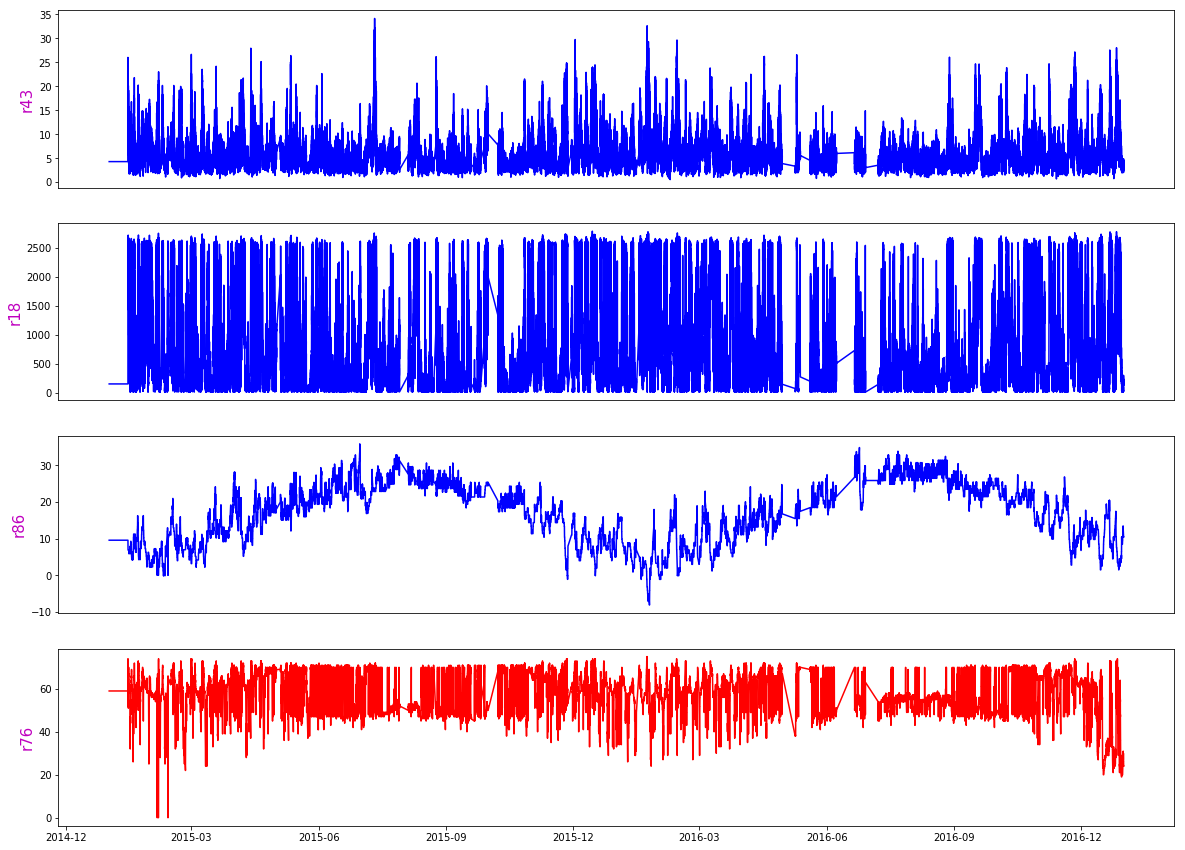

In [76]:
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.family'] = 'Kaiti' #黑体
# matplotlib.rcParams['font.size'] = '20'
# plt.rcParams['axes.unicode_minus']=False # 解决负值不显示
plt.figure(figsize=(20,15))
plt.subplot(411), plt.plot(df['r43'], "b-", alpha=1), plt.ylabel('r43',fontsize=15, color='m'),plt.xticks([])
plt.subplot(412), plt.plot(df['r18'], "b-", alpha=1), plt.ylabel('r18',fontsize=15, color='m'),plt.xticks([])
plt.subplot(413), plt.plot(df['r86'], "b-", alpha=1), plt.ylabel('r86',fontsize=15, color='m'),plt.xticks([])
plt.subplot(414), plt.plot(df['r78'], "r-", alpha=1), plt.ylabel('r76',fontsize=15, color='m')
plt.show()

#### 3.2.2 散点图

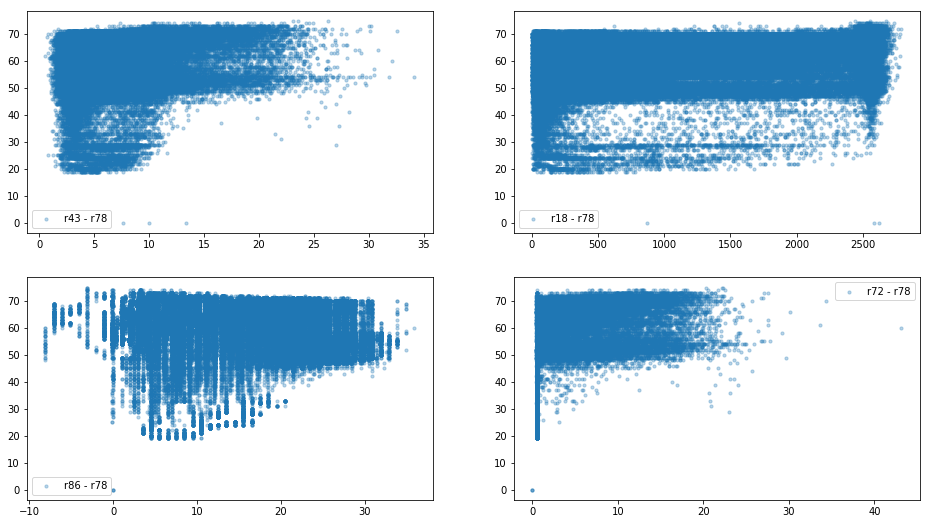

In [80]:
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(16,9))

plt.subplot(221), plt.scatter(df['r43'],df['r78'],alpha=0.3, s=10, label='r43 - r78'), plt.legend()
plt.subplot(222), plt.scatter(df['r18'],df['r78'],alpha=0.3, s=10, label='r18 - r78'), plt.legend()
plt.subplot(223), plt.scatter(df['r86'],df['r78'],alpha=0.3, s=10, label='r86 - r78'), plt.legend()
plt.subplot(224), plt.scatter(df['r72'],df['r78'],alpha=0.3, s=10, label='r72 - r78'), plt.legend()

plt.show()

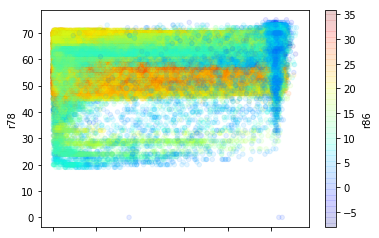

In [81]:
df.plot(kind="scatter", x="r18",y="r78",alpha=0.1,
       c="r86", cmap=plt.get_cmap("jet"), colorbar=True,)
# plt.title('环境温度—主轴承温度')
plt.show()

### 最初相关性

In [82]:
corr_matrix_df = df.corr()
corr_matrix_df["r78"].sort_values(ascending=False)

r78    1.000000
r18    0.163193
r43    0.154794
r47    0.145320
r73    0.121562
r72    0.121558
r74    0.121547
r60    0.003700
r84   -0.045244
r86   -0.114417
Name: r78, dtype: float64

### 构造特征

In [2]:
# 拷贝 df
dfc = df.copy()

# 1. 偏航夹角变成绝对值
dfc['r60'] = np.abs(dfc['r60'])

# 2.变桨角度取3者平均值
dfc['pitch_angle_mean'] = 1 / 3 * (dfc['r72'] + dfc['r73'] + dfc['r74'])
dfc.drop(['r72', 'r73', 'r74'],axis=1, inplace=True) # 删除'r72', 'r73', 'r74'

# 3. 温度转换成绝对温度
dfc['r84'] = dfc['r84'] + 273.15
dfc['r86'] = dfc['r86'] + 273.15
dfc['r78'] = dfc['r78'] + 273.15

# 4、移动标准差（风速、功率、机舱温度、环境温度）1小时，3小时，6小时
dfc['r43_mov_std_10'] = dfc['r43'].rolling(10, min_periods=1).std()
dfc['r18_mov_std_10'] = dfc['r18'].rolling(10, min_periods=1).std()
dfc['r84_mov_std_10'] = dfc['r84'].rolling(10, min_periods=1).std()
dfc['r86_mov_std_10'] = dfc['r86'].rolling(10, min_periods=1).std()

dfc['r43_mov_std_30'] = dfc['r43'].rolling(30, min_periods=1).std()
dfc['r18_mov_std_30'] = dfc['r18'].rolling(30, min_periods=1).std()
dfc['r84_mov_std_30'] = dfc['r84'].rolling(30, min_periods=1).std()
dfc['r86_mov_std_30'] = dfc['r86'].rolling(30, min_periods=1).std()

dfc['r43_mov_std_60'] = dfc['r43'].rolling(60, min_periods=1).std()
dfc['r18_mov_std_60'] = dfc['r18'].rolling(60, min_periods=1).std()
dfc['r84_mov_std_60'] = dfc['r84'].rolling(60, min_periods=1).std()
dfc['r86_mov_std_60'] = dfc['r86'].rolling(60, min_periods=1).std()

# 5、移动平均（风速、功率、机舱温度、环境温度）1小时，3小时，6小时
dfc['r43_mov_mean_10'] = dfc['r43'].rolling(10, min_periods=1).mean()
dfc['r18_mov_mean_10'] = dfc['r18'].rolling(10, min_periods=1).mean()
dfc['r84_mov_mean_10'] = dfc['r84'].rolling(10, min_periods=1).mean()
dfc['r86_mov_mean_10'] = dfc['r86'].rolling(10, min_periods=1).mean()

dfc['r43_mov_mean_30'] = dfc['r43'].rolling(30, min_periods=1).mean()
dfc['r18_mov_mean_30'] = dfc['r18'].rolling(30, min_periods=1).mean()
dfc['r84_mov_mean_30'] = dfc['r84'].rolling(30, min_periods=1).mean()
dfc['r86_mov_mean_30'] = dfc['r86'].rolling(30, min_periods=1).mean()

dfc['r43_mov_mean_60'] = dfc['r43'].rolling(60, min_periods=1).mean()
dfc['r18_mov_mean_60'] = dfc['r18'].rolling(60, min_periods=1).mean()
dfc['r84_mov_mean_60'] = dfc['r84'].rolling(60, min_periods=1).mean()
dfc['r86_mov_mean_60'] = dfc['r86'].rolling(60, min_periods=1).mean()

# 6、构造风速的平方
dfc['r43_mut_r43'] = dfc['r43'] * dfc['r43'] 

# 7、构造 风速 / 温度
dfc['r43_div_r86'] = dfc['r43'] / dfc['r86']
dfc['r43_div_r84'] = dfc['r43'] / dfc['r84']

# 8、机舱温度 * 环境温度
dfc['r84_mut_r86'] = dfc['r84'] * dfc['r86'] 

# 9、构造风速，桨距角的相邻差值
dfc.loc[1:,'r43_diff'] = np.abs(np.diff(dfc['r43'].values))
dfc.loc[1:,'pitch_angle_mean_diff'] = np.abs(np.diff(dfc['pitch_angle_mean'].values))

# 10、构造风速，桨距角的相邻变化率
dfc.loc[1:,'r43_ratio'] = dfc['r43_diff'].values[1:] / (dfc['r43'].values[:-1] + 1)
dfc.loc[1:,'pitch_angle_mean_ratio'] = dfc['pitch_angle_mean_diff'].values[1:] / (dfc['pitch_angle_mean'].values[:-1] + 1)

# 11、构造风速，桨距角的相邻变化情况，变化记为1，不变记为0
dfc['r43_diff_count'] = dfc['r43_diff'].apply(lambda x: 1 if x !=0  else 0)
dfc['pitch_angle_mean_diff_count'] = dfc['pitch_angle_mean_diff'].apply(lambda x: 1 if x !=0  else 0)

# 12、构造风速、桨距角的移动变化次数和
dfc['r43_diff_count_mov_sum_10'] = dfc['r43_diff_count'].rolling(10, min_periods=1).sum()
dfc['r43_diff_count_mov_sum_30'] = dfc['r43_diff_count'].rolling(30, min_periods=1).sum()
dfc['r43_diff_count_mov_sum_60'] = dfc['r43_diff_count'].rolling(60, min_periods=1).sum()

dfc['pitch_angle_mean_diff_count_mov_sum_10'] = dfc['pitch_angle_mean_diff_count'].rolling(10, min_periods=1).sum()
dfc['pitch_angle_mean_diff_count_mov_sum_30'] = dfc['pitch_angle_mean_diff_count'].rolling(30, min_periods=1).sum()
dfc['pitch_angle_mean_diff_count_mov_sum_60'] = dfc['pitch_angle_mean_diff_count'].rolling(60, min_periods=1).sum()

### 构造新特征后的相关性

In [3]:
corr_matrix_dfc = dfc.corr()
corr_matrix_dfc["r78"].sort_values(ascending=False)

r78                                       1.000000
pitch_angle_mean_diff_count_mov_sum_60    0.224252
pitch_angle_mean_diff_count_mov_sum_30    0.220934
pitch_angle_mean_diff_count_mov_sum_10    0.199155
r18_mov_mean_10                           0.172506
r18_mov_mean_30                           0.171532
r43_mov_mean_10                           0.170337
r43_mov_mean_30                           0.170233
r18_mov_mean_60                           0.167681
r43_mov_mean_60                           0.166652
r18                                       0.163193
r43_div_r86                               0.162256
r43_div_r84                               0.157222
r43                                       0.154794
r47                                       0.145320
r43_mut_r43                               0.129629
r43_mov_std_60                            0.122475
pitch_angle_mean                          0.121556
r43_mov_std_30                            0.121112
pitch_angle_mean_diff          

### 一些构造变量的作图显示

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(20,15))
plt.subplot(211), plt.plot(dfc['pitch_angle_mean_diff_count_mov_sum_30'], "b.", alpha=0.1), plt.ylabel('pitch_angle_mean_diff_count_mov_sum_30',fontsize=20, color='m'),plt.xticks([])
plt.subplot(212), plt.plot(dfc['r78'], "r.", alpha=0.1), plt.ylabel('r78',fontsize=20, color='m')
plt.show()

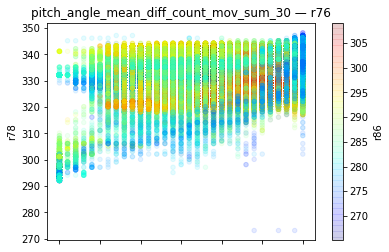

In [87]:
dfc.plot(kind="scatter", x="pitch_angle_mean_diff_count_mov_sum_30",y="r78",alpha=0.1,
       c="r86", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.title('pitch_angle_mean_diff_count_mov_sum_30 — r76')
plt.show()

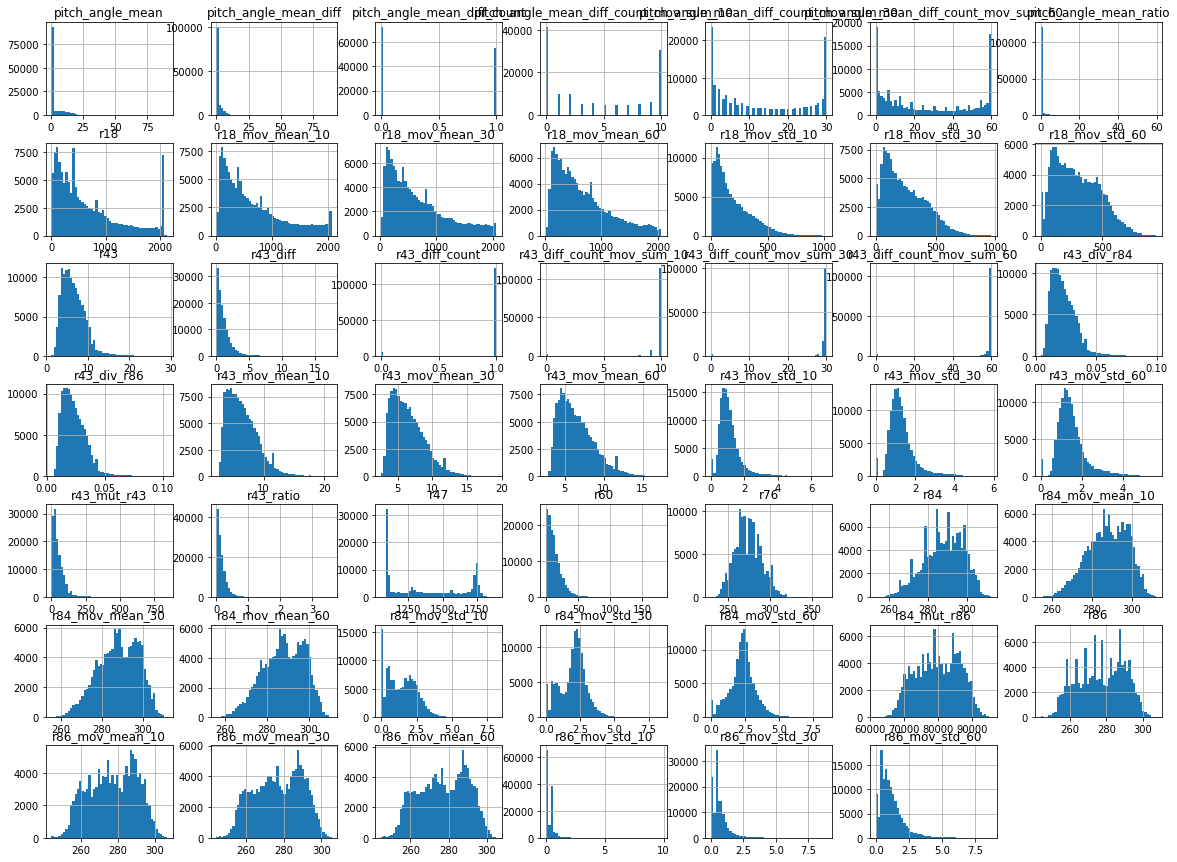

In [51]:
%matplotlib inline  
import matplotlib.pyplot as plt
dfc.hist(bins=50, figsize=(20,15))
plt.show()

## 随机森林查看特征重要性

In [4]:
# 拷贝一个dfc
dfu = dfc.copy()
dfu[dfu == np.inf] = np.nan
dfu.dropna(axis=0, how='any',inplace=True)

# X 与 y 划分
y = dfu.pop('r78')
X = dfu
print(X.shape, y.shape)

# 训练集与测试集划分
X_train = X.loc['2015-01-01':'2015-12-31',:]
y_train = y['2015-01-01':'2015-12-31']

X_test = X.loc['2016-01-01':'2016-12-31',:]
y_test = y['2016-01-01':'2016-12-31']

# 标准化
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

# 模型
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, max_features='sqrt', random_state=33, n_jobs=-1)

# 交叉验证值
# cross_val_score(model, X, y, scoring='r2', cv=5)

model.fit(X_train, y_train)

# 重要性排序
attris = dfu.columns
feature_importances = model.feature_importances_
sorted(zip(feature_importances,attris), reverse=True)

(152202, 47) (152202,)


[(0.10099818814646928, 'r86_mov_mean_60'),
 (0.08275336045481685, 'r86_mov_mean_30'),
 (0.06494604279157148, 'r86_mov_mean_10'),
 (0.05487735922692988, 'r86'),
 (0.051590440705193134, 'r84_mut_r86'),
 (0.03801789154596699, 'r43_mov_mean_30'),
 (0.03639857614002355, 'r43_mov_mean_60'),
 (0.03528786392329178, 'r18_mov_mean_30'),
 (0.03409868617399932, 'r84'),
 (0.03147728027782118, 'r84_mov_std_30'),
 (0.031089340447862174, 'r84_mov_mean_60'),
 (0.03039120656959837, 'r86_mov_std_60'),
 (0.028629519120164263, 'r84_mov_mean_30'),
 (0.028507049191234635, 'r84_mov_mean_10'),
 (0.026586347421169828, 'r86_mov_std_10'),
 (0.026322037492846163, 'r84_mov_std_60'),
 (0.025219303017219072, 'r18_mov_mean_60'),
 (0.02509697273368223, 'r86_mov_std_30'),
 (0.02359042065689649, 'r18_mov_mean_10'),
 (0.022523316753725656, 'r43_mov_mean_10'),
 (0.021589421903697916, 'r43_mov_std_60'),
 (0.020586821039828923, 'r84_mov_std_10'),
 (0.019625466348811585, 'r18_mov_std_60'),
 (0.01729721896374107, 'pitch_angle_

In [5]:
from sklearn.metrics import r2_score, mean_squared_error

# y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('\n随机森林')
print('r2_score: ', r2_score(y_test, y_test_pred))
print('mse: ', mean_squared_error(y_test, y_test_pred))


随机森林
r2_score:  0.16940436052947394
mse:  75.07206889462039


### 线性回归

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print('\n线性回归')
print('r2_score: ', r2_score(y_test, lin_reg.predict(X_test)))
print('mse: ', mean_squared_error(y_test, lin_reg.predict(X_test)))


线性回归
r2_score:  -0.011999609747955775
mse:  91.46797889856175


### 支持向量机(计算很慢)

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train.ravel())

svr_y_test_pred = svr.predict(X_test)

print('\n径向基支持向量机')
print('r2_score: ', r2_score(y_test, svr_y_test_pred ))
print('mse: ', mean_squared_error(y_test, svr_y_test_pred ))

### 梯度提升树

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, subsample=0.8, random_state=33, max_features='sqrt')
gbr.fit(X_train, y_train)

print('\n梯度提升树')
print('r2_score: ', r2_score(y_test, gbr.predict(X_test)))
print('mse: ', mean_squared_error(y_test, gbr.predict(X_test)))


梯度提升树
r2_score:  0.7212057176923479
mse:  74.56172351224168


### K近邻回归

In [19]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=20, weights='distance')
knr.fit(X_train, y_train)

knr_y_test_predict = knr.predict(X_test)

print('\nK近邻回归算法')
print('r2_score: ', r2_score(y_test, knr_y_test_predict))
print('mse: ', mean_squared_error(y_test, knr_y_test_predict))


K近邻回归算法
r2_score:  0.6228864134161195
mse:  100.85658408355864


# 预测作图

In [12]:
# 模型
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, subsample=0.8, random_state=33, max_features='sqrt')
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


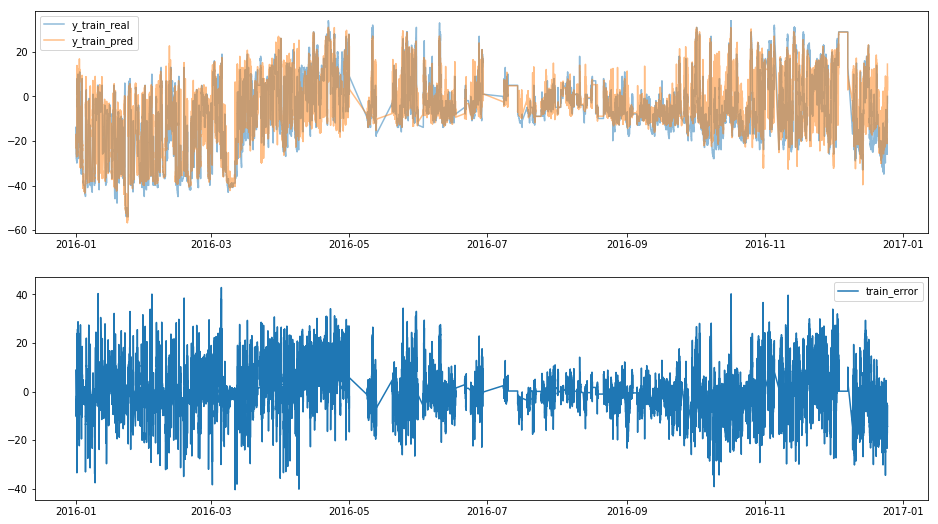

In [13]:
# Train作图
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.subplot(2,1,1)
plt.plot(y_train, alpha=0.5, label = 'y_train_real')
plt.plot(y_train.index, y_train_pred, alpha=0.5, label = 'y_train_pred')
plt.legend()
plt.subplot(2,1,2)
plt.plot(y_train.index, y_train- y_train_pred,label = 'train_error')
plt.legend()
plt.show()

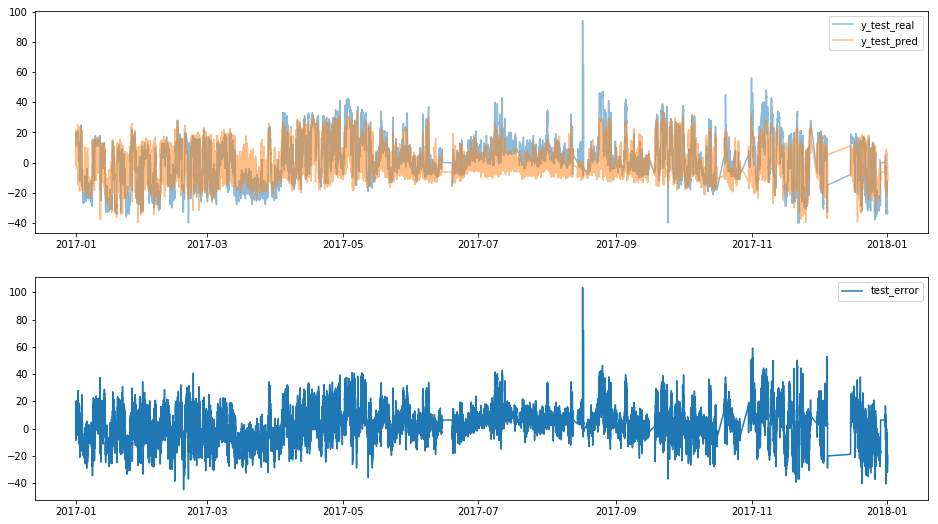

In [14]:
# Test作图
plt.figure(figsize=(16,9))
plt.subplot(2,1,1)
plt.plot(y_test, alpha=0.5, label = 'y_test_real')
plt.plot(y_test.index, y_test_pred, alpha=0.5, label = 'y_test_pred')
plt.legend()
plt.subplot(2,1,2)
plt.plot(y_test.index, y_test.values-y_test_pred, label = 'test_error')
plt.legend()
plt.show()